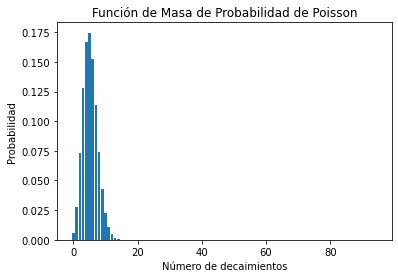

ValueError: x and y must have same first dimension, but have shapes (97,) and (95,)

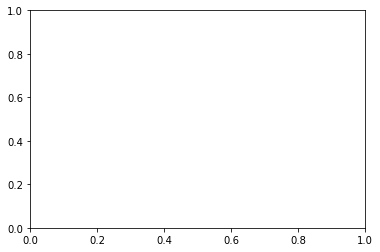

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy import integrate
from numba import njit
from scipy.stats import poisson

def simul3(N, time):
    numero_nucleos = N
    numero_decaimientos = []
    tiempos = []
    ti = 0
    x_nucleos = []
    poissonPDF = []
    poissonCDF = []

    while numero_nucleos > 0:
        dec = poisson.rvs(pdf[0] * numero_nucleos, size=1)[0]
        tiempos.append(ti)
        numero_decaimientos.append(dec)
        numero_nucleos -= dec

        if time >= ti and time < (ti + 5):  # Calcular PDF y CDF de Poisson para el tiempo deseado
            x_nucleos = range(0, numero_nucleos + 1)
            poissonCDF = poisson.cdf(x_nucleos, pdf[0] * numero_nucleos)
            poissonPDF = poisson.pmf(x_nucleos, pdf[0] * numero_nucleos)

        ti += 5

    return tiempos, numero_decaimientos, x_nucleos, poissonPDF, poissonCDF

time = 0
s = simul3(100, time)

# Graficar la PMF de Poisson
plt.bar(s[2], s[3])
plt.xlabel("Número de decaimientos")
plt.ylabel("Probabilidad")
plt.title("Función de Masa de Probabilidad de Poisson")
plt.show()

# Graficar la CDF de Poisson respecto al tiempo
plt.step(s[0], s[4])
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad acumulada")
plt.title("Función de Distribución Acumulativa de Poisson")
plt.show()
